![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Natural Language Processing (NLP)

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

In [85]:
# Packages used in this notebook
import requests
from bs4 import BeautifulSoup
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
import pandas as pd
import configparser
import openai

### Task: Sourcing

The first stage involves sourcing and reading the textual content of scientific papers. You find an example pdf file in ``../lit/nonanswers.pdf``. Please [download](https://scholar.google.de/) and analyze at least one additional paper of your choice (make sure to commit the paper to your repository).

Use an appropriate PDF reading library or tool to programmatically extract the text. You can find an example below, however, you are free to use any Python library you like.

In [86]:
# Step 1: Install pdfminer.six if you haven't already
# You can install it using conda or pip, see 
  # https://anaconda.org/conda-forge/pdfminer.six
  # https://pypi.org/project/pdfminer.six/
#!pip install pdfminer.six
#!pip install openai nltk wordcloud
#nltk.download('stopwords')
#!pip install gensim


# Step 2: Import the required module
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
extracted_text = extract_text('../lit/printListener.pdf')
print(extracted_text[0:80])

PrintListener: Uncovering the Vulnerability of Fingerprint Authentication via th


### Task: Pre-processing

Pre-processing is a critical step aimed at cleaning and preparing the text data for analysis. Steps that you should consider:

* Removing punctuation, numbers and special characters using regular expressions.
* Converting all the text to a uniform case (usually lower case) to ensure that the analysis is not case-sensitive.
* Stop word removal, i.e. eliminating commonly used words (e.g., 'and', 'the', 'is') that do not contribute significantly to the overall meaning and can skew the analysis.
* Other potential pre-processing steps might include stemming and lemmatization, depending on the specific requirements and goals of the analysis. (optional)

In [87]:
# Regex to remove all non-alphabetical characters except German special chars and "-"
processed_text = re.sub('[^a-zA-ZäöüÄÖÜß-]', ' ', extracted_text)
# Convert all characters to lowercase 
processed_text = processed_text.lower()
# Split the text into individual words (you could also use 'nltk.tokenize.word_tokenize' or lemming/stemming)
processed_text = processed_text.split()

# Please note that news articles here are in English and German, so we combine both stop words lists
stop_words = set(nltk.corpus.stopwords.words('german') + nltk.corpus.stopwords.words('english'))
# Remove stop words and words of length one from the processed text
processed_text = [word for word in processed_text if word not in stop_words and len(word) > 1]

print(processed_text)

['printlistener', 'uncovering', 'vulnerability', 'fingerprint', 'authentication', 'via', 'finger', 'friction', 'sound', 'zhou', 'shuao', 'su', 'qian', 'wang', 'qi', 'li', 'yuting', 'zhou', 'xiaojing', 'zhengxiong', 'li', 'school', 'cyber', 'science', 'engineering', 'huazhong', 'university', 'science', 'technology', 'china', 'school', 'cyber', 'science', 'engineering', 'wuhan', 'university', 'china', 'institute', 'network', 'sciences', 'cyberspace', 'tsinghua', 'university', 'china', 'department', 'computer', 'science', 'engineering', 'university', 'colorado', 'denver', 'usa', 'email', 'zhouman', 'lindahust', 'hust', 'edu', 'cn', 'qianwang', 'whu', 'edu', 'cn', 'qli', 'tsinghua', 'edu', 'cn', 'zhengxiong', 'li', 'ucdenver', 'edu', 'abstract', 'fingerprint', 'authentication', 'extensively', 'employed', 'contemporary', 'identity', 'verification', 'systems', 'owing', 'rapidity', 'cost-effectiveness', 'due', 'widespread', 'use', 'fingerprint', 'leakage', 'may', 'cause', 'sensitive', 'inform

### Task: Analysis

The final stage is the analysis of the pre-processed text, in order to extract meaningful context. This may involve:

* Frequency Analysis: Determining the most commonly occurring words or phrases, which can provide initial insights into the primary focus areas of the papers. Consider, e.g. a word cloud as a visualization.
* Contextual Analysis: Using more advanced NLP techniques such as Word Embedding or Topic Modeling to understand the context of the papers.
* Sentiment analysis: We would expect that scientific papers are written in a neutral tone, can you confirm this?
* Summarization: Employing algorithms to generate concise summaries of the papers, capturing the key points and findings.

Pick any method that you like (you are allowed to use ChatGPT's API as well).

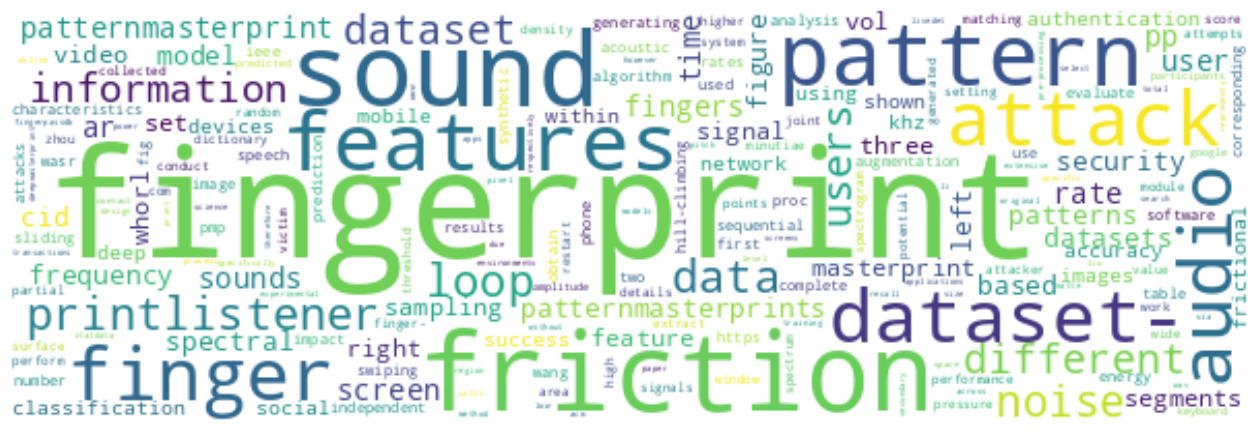

In [88]:
#FREQUENCY ANALYSIS

# Counts the frequency of each word in 'raw_text' (note the split function to separate words)
word_frequency = collections.Counter(processed_text)
#print(word_frequency)

# Generates a Word Cloud image from the word frequencies
#wc = WordCloud(width=600, height=200, max_words=200, background_color='white').generate_from_frequencies(word_frequency)
#plt.figure(figsize=(16,12))
#plt.imshow(wc, interpolation='bilinear')
#plt.axis('off')
#plt.show()

#Fingerprints and fingerprint seems to be counted as two seperate words, lets fuse them together
word_frequency['fingerprint'] += word_frequency['fingerprints']
word_frequency.pop('fingerprints')

# Generates a Word Cloud image from the word frequencies, this time with updated count
wc = WordCloud(width=600, height=200, max_words=200, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [89]:
# SENTIMENT ANALYSIS
# Importing necessary libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
# nltk.download('vader_lexicon')

def analyze_sentiment(article_text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(article_text)
    return sentiment

def analyze_sentiment_in_words(article_text):
    sentiment_scores = analyze_sentiment(article_text)
    sentiment_values = [sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos']]
    
    # Find the index of the maximum value
    max_index = sentiment_values.index(max(sentiment_values))

    if max_index == 0:
        return "negativ"
    elif max_index == 1:
        return "neutral"
    elif max_index == 2:
        return "positive"

print(f"The article has a polarity of: {analyze_sentiment(extracted_text)} and is thus fairly {analyze_sentiment_in_words(extracted_text)}")



The article has a polarity of: {'neg': 0.053, 'neu': 0.878, 'pos': 0.068, 'compound': 0.9994} and is thus fairly neutral


#